In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import h3pandas

permits_df = pd.read_csv('C:/Users/aaron/Code/Data/Building_Permits_20240307.csv', parse_dates=[10])

pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

In [2]:
permits_df.head()

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,AppliedDate,IssuedDate,ExpiresDate,CompletedDate,StatusCurrent,RelatedMup,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location1
0,6936152-DM,Multifamily,Residential,Demolition,NaN,"Demo multi-family structure, per plan",20.0,20.0,236.0,21424875.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,4200 S WEBSTER ST,SEATTLE,WA,98118.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.535552,-122.280227,"(47.53555241, -122.2802271)"
1,6994764-CN,Multifamily,Residential,Building,New,"Construct north two-family dwelling, per plan....",NaN,NaN,NaN,565948.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,1615 N 50TH ST,SEATTLE,WA,98103.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.664802,-122.338456,"(47.66480192, -122.3384564)"
2,6999483-DM,Multifamily,Residential,Demolition,Deconstruction,Demolish existing single-family dwelling with ...,1.0,1.0,4.0,0.0,2024-03-05,NaN,NaN,NaN,Scheduled and Submitted,NaN,6117 12TH AVE NE,SEATTLE,WA,98115.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.672957,-122.315952,"(47.67295731, -122.31595199)"
3,7002569-CN,Single Family/Duplex,Residential,Building,New,Establish use as single family residence with ...,NaN,NaN,NaN,743455.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,322 NW 47th ST,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,47.663071,-122.361852,"(47.66307142, -122.36185191)"
4,7002837-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Deck Construction,1.0,0.0,0.0,20000.0,2024-03-05,2024-03-05,2025-09-05,NaN,Additional Info Requested,NaN,4028 SW THISTLE ST,SEATTLE,WA,98136.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.528642,-122.384193,"(47.5286416, -122.38419264)"


In [3]:
permits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170715 entries, 0 to 170714
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   PermitNum              170715 non-null  object        
 1   PermitClass            164244 non-null  object        
 2   PermitClassMapped      164244 non-null  object        
 3   PermitTypeMapped       170715 non-null  object        
 4   PermitTypeDesc         160279 non-null  object        
 5   Description            170394 non-null  object        
 6   HousingUnits           28114 non-null   float64       
 7   HousingUnitsRemoved    80742 non-null   float64       
 8   HousingUnitsAdded      80742 non-null   float64       
 9   EstProjectCost         135938 non-null  float64       
 10  AppliedDate            131227 non-null  datetime64[ns]
 11  IssuedDate             124429 non-null  object        
 12  ExpiresDate            124584 non-null  obje

In [4]:
permits_df['AppliedYear'] = pd.DatetimeIndex(permits_df['AppliedDate']).year
permits_df = permits_df.dropna(subset='Location1')

In [5]:
permits_df.sort_values('EstProjectCost', ascending=False).iloc[1]

PermitNum                                                       6973064-DM
PermitClass                                                    Multifamily
PermitClassMapped                                              Residential
PermitTypeMapped                                                Demolition
PermitTypeDesc                                                         NaN
Description              Building a new 5 story over a 2 story base str...
HousingUnits                                                           0.0
HousingUnitsRemoved                                                    0.0
HousingUnitsAdded                                                     52.0
EstProjectCost                                               25000000000.0
AppliedDate                                                            NaT
IssuedDate                                                             NaN
ExpiresDate                                                            NaN
CompletedDate            

C:\Users\aaron\AppData\Local\Temp\ipykernel_20188\3928418343.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_axis, y_axis, s = 2, cmap = 'seismic', marker='h')


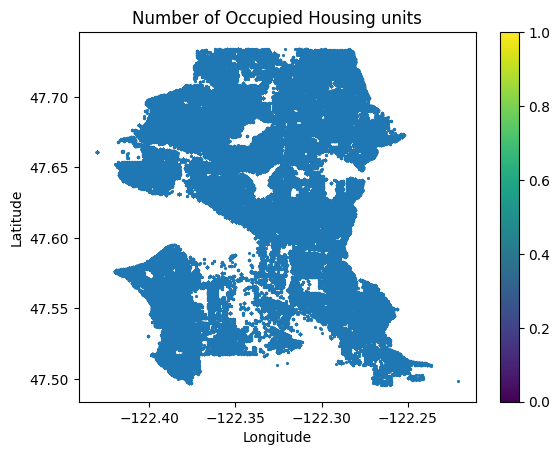

In [6]:
x_axis = permits_df['Longitude']
y_axis = permits_df['Latitude']

#matplotlib.pyplot.scatter(x_axis, y_axis, c = color, s = 2, cmap = 'seismic', marker='h')
plt.scatter(x_axis, y_axis, s = 2, cmap = 'seismic', marker='h')
plt.title('Number of Occupied Housing units')
plt.rcParams["figure.figsize"] = (10,13.5)
#plt.legend(loc = "lower left")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

In [7]:
seattle_by_zip = permits_df.groupby('OriginalZip').aggregate({'EstProjectCost':'sum', 'Latitude':'first', 'Longitude':'first'})

In [8]:
seattle_by_zip.tail()

,EstProjectCost,Latitude,Longitude
OriginalZip,,,
98168.0,1.738132e+06,47.510472,-122.291367
98177.0,2.071906e+09,47.701748,-122.376412
98178.0,1.476947e+08,47.511530,-122.245398
98195.0,1.814275e+09,47.651762,-122.307574
98199.0,1.225771e+09,47.659361,-122.399819


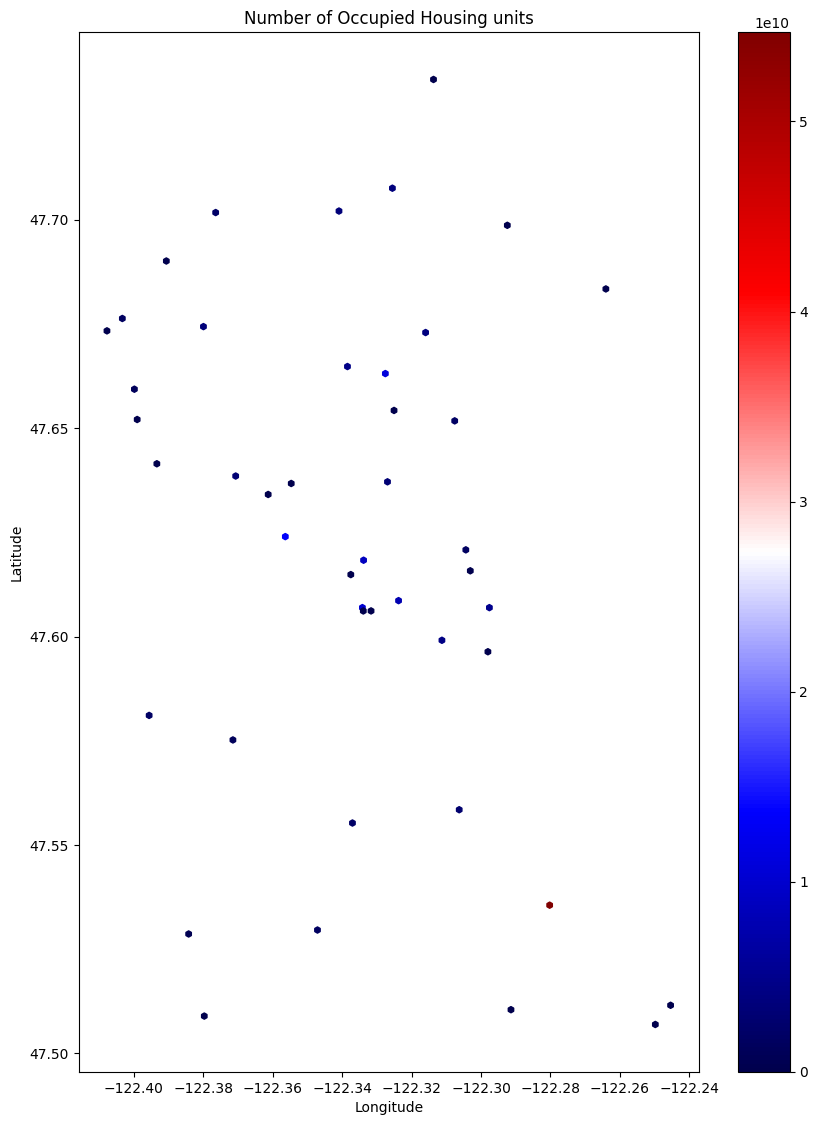

In [9]:
x_axis = seattle_by_zip['Longitude']
y_axis = seattle_by_zip['Latitude']
color = seattle_by_zip['EstProjectCost']

plt.scatter(x_axis, y_axis, c = color, s = 20, cmap = 'seismic', marker='h')

plt.title('Number of Occupied Housing units')
plt.rcParams["figure.figsize"] = (10,13.5)
#plt.legend(loc = "lower left")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

In [10]:
geo_permits_df = gpd.GeoDataFrame(permits_df, geometry=gpd.points_from_xy(permits_df.Longitude, permits_df.Latitude))

In [11]:
geo_permits_df.head()

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,AppliedDate,IssuedDate,ExpiresDate,CompletedDate,StatusCurrent,RelatedMup,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location1,AppliedYear,geometry
0,6936152-DM,Multifamily,Residential,Demolition,NaN,"Demo multi-family structure, per plan",20.0,20.0,236.0,21424875.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,4200 S WEBSTER ST,SEATTLE,WA,98118.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.535552,-122.280227,"(47.53555241, -122.2802271)",2024.0,POINT (-122.28023 47.53555)
1,6994764-CN,Multifamily,Residential,Building,New,"Construct north two-family dwelling, per plan....",NaN,NaN,NaN,565948.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,1615 N 50TH ST,SEATTLE,WA,98103.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.664802,-122.338456,"(47.66480192, -122.3384564)",2024.0,POINT (-122.33846 47.66480)
2,6999483-DM,Multifamily,Residential,Demolition,Deconstruction,Demolish existing single-family dwelling with ...,1.0,1.0,4.0,0.0,2024-03-05,NaN,NaN,NaN,Scheduled and Submitted,NaN,6117 12TH AVE NE,SEATTLE,WA,98115.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.672957,-122.315952,"(47.67295731, -122.31595199)",2024.0,POINT (-122.31595 47.67296)
3,7002569-CN,Single Family/Duplex,Residential,Building,New,Establish use as single family residence with ...,NaN,NaN,NaN,743455.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,322 NW 47th ST,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,47.663071,-122.361852,"(47.66307142, -122.36185191)",2024.0,POINT (-122.36185 47.66307)
4,7002837-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Deck Construction,1.0,0.0,0.0,20000.0,2024-03-05,2024-03-05,2025-09-05,NaN,Additional Info Requested,NaN,4028 SW THISTLE ST,SEATTLE,WA,98136.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.528642,-122.384193,"(47.5286416, -122.38419264)",2024.0,POINT (-122.38419 47.52864)


<Axes: >

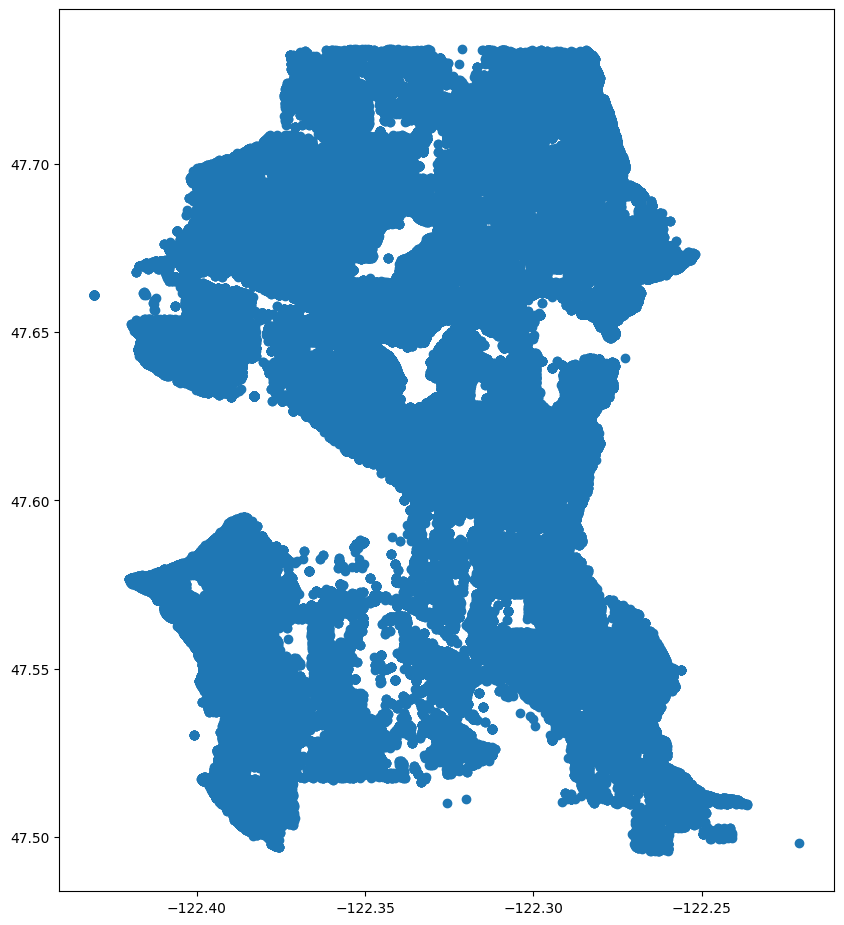

In [12]:
geo_permits_df.plot()

In [13]:
hexagons = geo_permits_df.h3.geo_to_h3(8, lat_col='Latitude',lng_col='Longitude')

<Axes: >

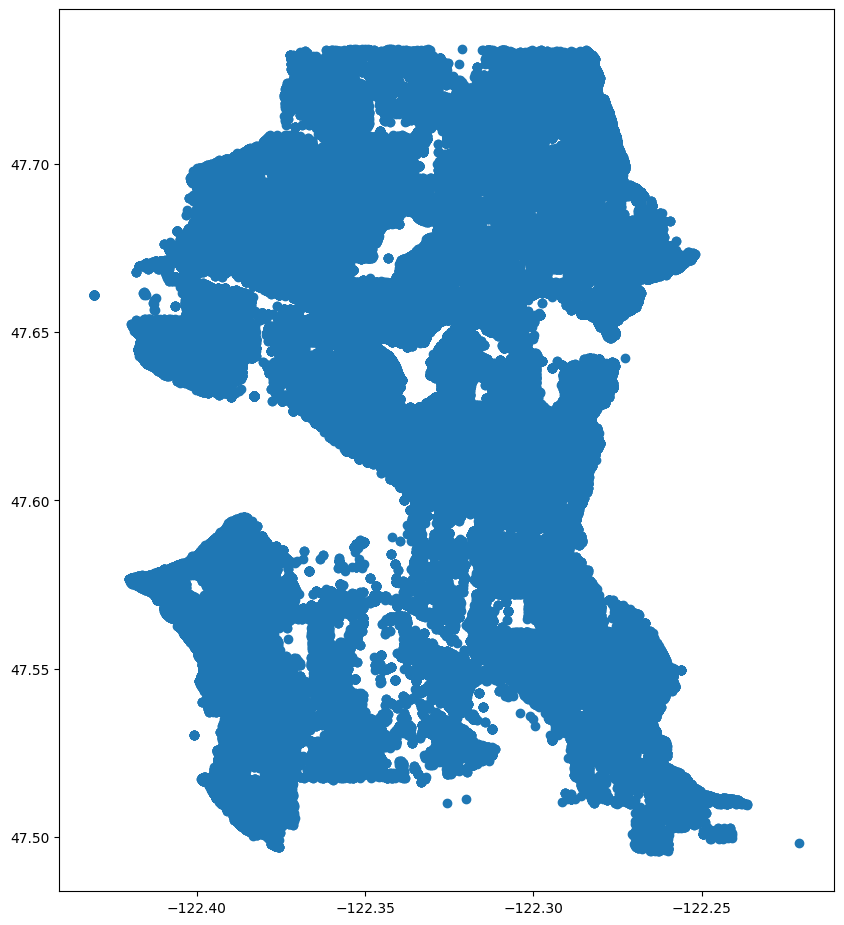

In [14]:
hexagons.plot()

In [15]:
hexagons.head()

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,AppliedDate,IssuedDate,ExpiresDate,CompletedDate,StatusCurrent,RelatedMup,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location1,AppliedYear,geometry
h3_08,,,,,,,,,,,,,,,,,,,,,,,,,,,
8828d550ebfffff,6936152-DM,Multifamily,Residential,Demolition,NaN,"Demo multi-family structure, per plan",20.0,20.0,236.0,21424875.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,4200 S WEBSTER ST,SEATTLE,WA,98118.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.535552,-122.280227,"(47.53555241, -122.2802271)",2024.0,POINT (-122.28023 47.53555)
8828d540d9fffff,6994764-CN,Multifamily,Residential,Building,New,"Construct north two-family dwelling, per plan....",NaN,NaN,NaN,565948.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,1615 N 50TH ST,SEATTLE,WA,98103.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.664802,-122.338456,"(47.66480192, -122.3384564)",2024.0,POINT (-122.33846 47.66480)
8828d540c3fffff,6999483-DM,Multifamily,Residential,Demolition,Deconstruction,Demolish existing single-family dwelling with ...,1.0,1.0,4.0,0.0,2024-03-05,NaN,NaN,NaN,Scheduled and Submitted,NaN,6117 12TH AVE NE,SEATTLE,WA,98115.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.672957,-122.315952,"(47.67295731, -122.31595199)",2024.0,POINT (-122.31595 47.67296)
8828d54761fffff,7002569-CN,Single Family/Duplex,Residential,Building,New,Establish use as single family residence with ...,NaN,NaN,NaN,743455.0,2024-03-05,NaN,NaN,NaN,Ready for Intake,NaN,322 NW 47th ST,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,47.663071,-122.361852,"(47.66307142, -122.36185191)",2024.0,POINT (-122.36185 47.66307)
8828d55701fffff,7002837-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Deck Construction,1.0,0.0,0.0,20000.0,2024-03-05,2024-03-05,2025-09-05,NaN,Additional Info Requested,NaN,4028 SW THISTLE ST,SEATTLE,WA,98136.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.528642,-122.384193,"(47.5286416, -122.38419264)",2024.0,POINT (-122.38419 47.52864)


In [16]:
hexagons.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 167890 entries, 8828d550ebfffff to 8828d542c1fffff
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   PermitNum              167890 non-null  object        
 1   PermitClass            161700 non-null  object        
 2   PermitClassMapped      161700 non-null  object        
 3   PermitTypeMapped       167890 non-null  object        
 4   PermitTypeDesc         157973 non-null  object        
 5   Description            167756 non-null  object        
 6   HousingUnits           27995 non-null   float64       
 7   HousingUnitsRemoved    78740 non-null   float64       
 8   HousingUnitsAdded      78740 non-null   float64       
 9   EstProjectCost         134053 non-null  float64       
 10  AppliedDate            129027 non-null  datetime64[ns]
 11  IssuedDate             122325 non-null  object        
 12  ExpiresDate       

In [17]:
hex_groups = hexagons.groupby('h3_08').sum()

C:\Users\aaron\AppData\Local\Temp\ipykernel_20188\1533510219.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hex_groups = hexagons.groupby('h3_08').sum()


In [18]:
hex_groups.head()

,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,OriginalZip,Latitude,Longitude,AppliedYear
h3_08,,,,,,,,
8828d54011fffff,71.0,36.0,40.0,2.168930e+09,62198570.0,31789.128645,-81561.044857,1033415.0
8828d54013fffff,94.0,31.0,535.0,1.519821e+08,48365765.0,24308.607144,-62367.376902,870299.0
8828d54015fffff,39.0,16.0,29.0,7.381146e+07,36985585.0,18397.140838,-47196.464054,499468.0
8828d54017fffff,135.0,80.0,195.0,9.925664e+07,42773780.0,21688.293632,-55636.053000,735296.0
8828d54019fffff,21.0,8.0,16.0,3.982761e+07,25409195.0,12675.779968,-32526.748932,251764.0


In [19]:
hex_boundary_groups = hex_groups.h3.h3_to_geo_boundary()

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


Text(0.5, 1.0, 'Seattle Project Cost (estimated)')

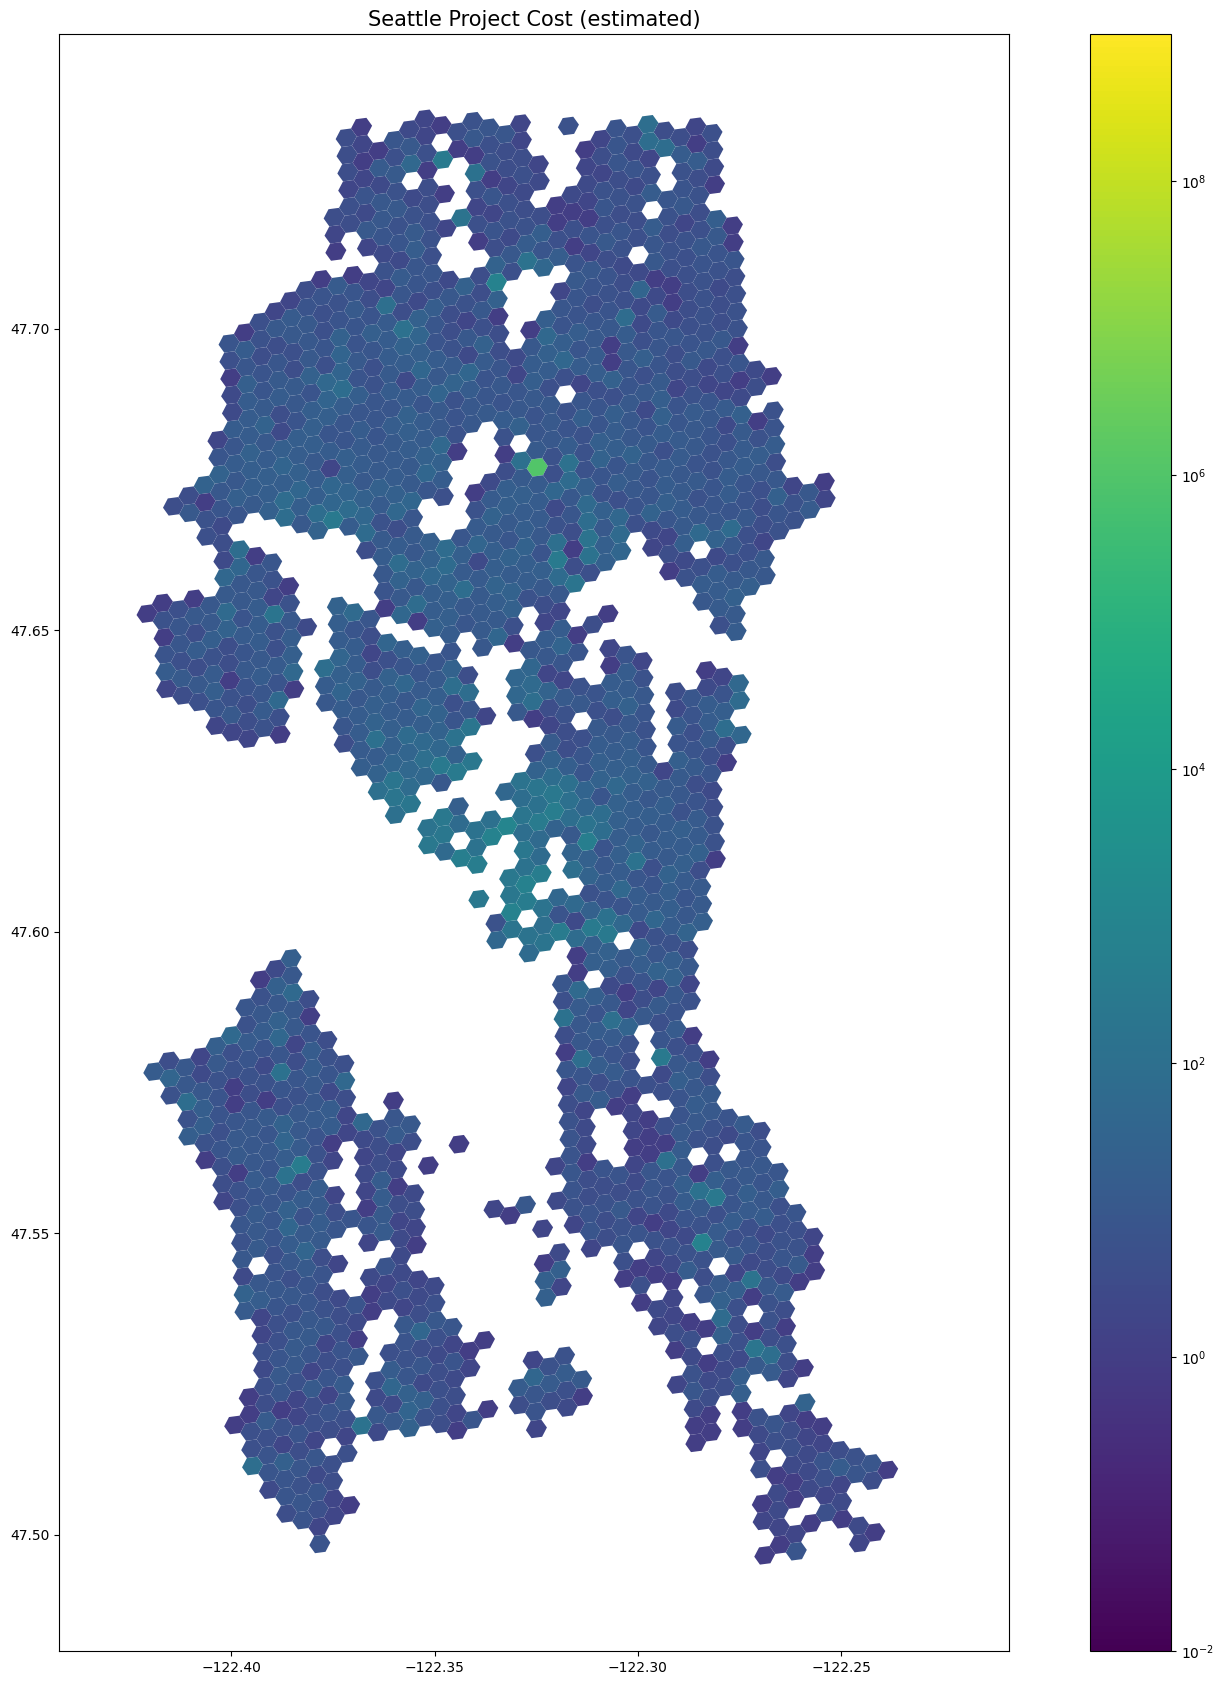

In [27]:
fig, ax = plt.subplots(figsize  = (21, 21))

hexagons = geo_permits_df.h3.geo_to_h3_aggregate(9)
hexagons.plot(column = 'HousingUnits',
                legend = True,
                norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 1000000000),
                ax = ax)

ax.set_title("Seattle Project Cost (estimated)", fontsize=15)

In [28]:
tt  = {'EstProjectCost', 'HousingUnits', 'HousingUnitsAdded'}

#norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 1000000000),
#norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 1000000000),

#Project_Cost_Estimated = hexagons.explore(column = 'HousingUnits', norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 1000000000), tooltip = tt)
Project_Cost_Estimated = hexagons.explore(column = 'HousingUnits', control_scale = False, tooltip = tt)

Project_Cost_Estimated

In [22]:
permits_df['AppliedYear'].value_counts()

2017.0    8590
2016.0    8420
2018.0    8407
2015.0    7944
2006.0    7773
2019.0    7596
2014.0    7451
2007.0    7292
2013.0    7244
2021.0    7038
2022.0    6753
2020.0    6528
2008.0    6216
2012.0    5895
2023.0    5591
2011.0    5571
2010.0    5176
2009.0    4852
2005.0    2956
2024.0     989
2004.0     378
2003.0     170
2002.0      81
2001.0      37
2000.0      24
1999.0      14
1992.0       8
1998.0       7
1990.0       6
1997.0       5
1996.0       5
1995.0       4
1994.0       2
1989.0       2
1988.0       1
1986.0       1
Name: AppliedYear, dtype: int64

In [23]:
hexagons_by_year = geo_permits_df.groupby('AppliedYear')

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\h3pandas\h3pandas.py:498: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .agg(operation)


Text(0.5, 1.0, 'Seattle Project Cost (estimated)')

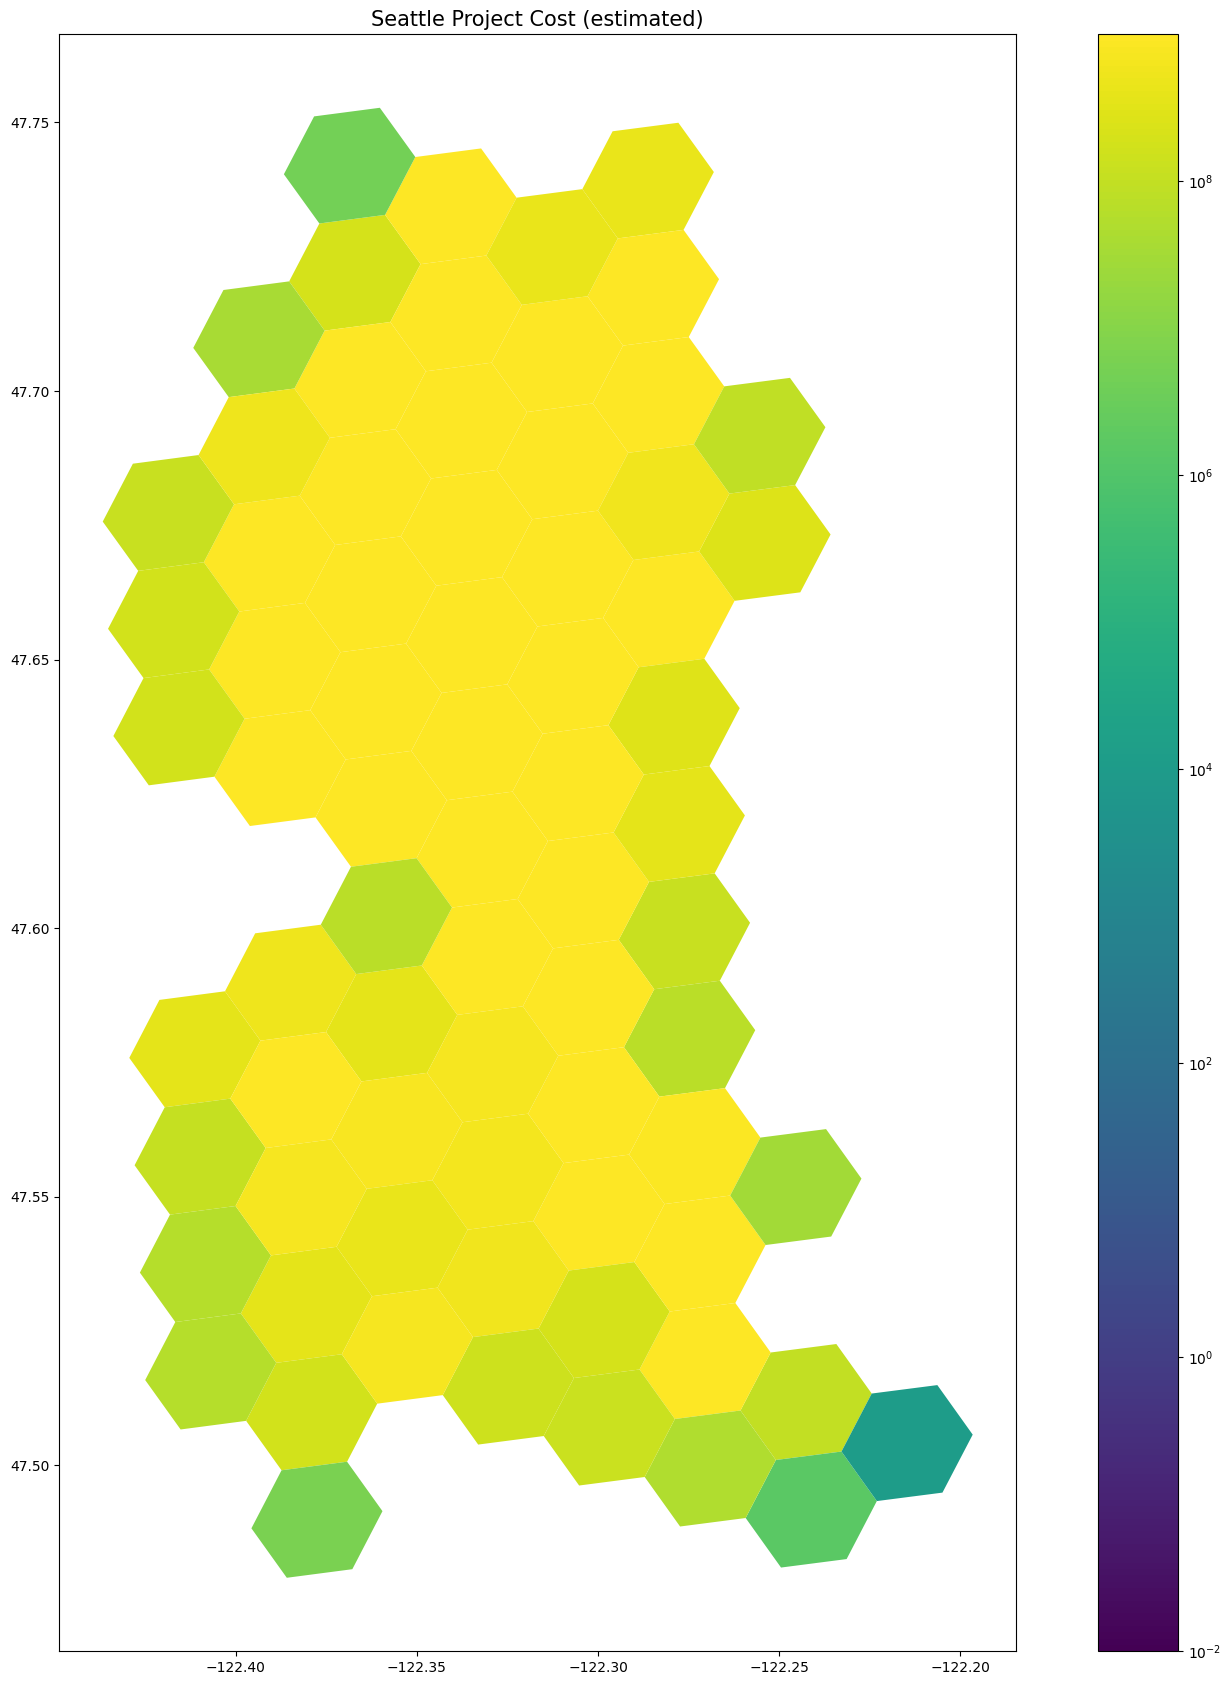

In [24]:
single_year = hexagons_by_year.get_group(2016.0)

fig, ax = plt.subplots(figsize  = (21, 21))

hexagons_by_year = single_year.h3.geo_to_h3_aggregate(9)
hexagons.plot(column = 'EstProjectCost',
                legend = True,
                norm=mpl.colors.LogNorm(vmin = 0.01, vmax = 1000000000),
                ax = ax)

ax.set_title("Seattle Project Cost (estimated)", fontsize=15)